In [153]:
import numpy as np

## Exercise 2.1

In [219]:
##Set some parameters for our model
beta = .442
delta = .6415
sigma = 3
A = 1
alpha = .35
per_len = 20
nvec = [1, 1, 0.2]
f_params = nvec, A, alpha, delta

In [220]:
def get_L(n1, n2, n3):
    L = n1 + n2 + n3
    return L

def get_k(b2, b3):
    K = b2 + b3
    return K

def get_r(K, L, params):
    alpha, A, delta = params
    r = alpha * A * (L/K)**(1-alpha) - delta
    return r

def get_w(K, L, params):
    alpha, A, delta = params
    w = (1-alpha)*A*(K/L)**alpha
    return w
def get_c(i, y):
    return y - i
def get_Y(K, L, params):
    alpha, A = params
    Y = A * K**alpha * L**(1-alpha)
    return Y

def utility(c, params):
    sigma = params
    u = (c**(1- sigma) -1)/(1- sigma)
    return u
def uprime(c, params):
    sigma = params
    uprime = c**(-sigma)
    return uprime

In [221]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    k_cnstr = False
    K = get_k(bvec_guess[0], bvec_guess[1])
    if K <= 0:
        k_cnstr = True
    L = get_L(nvec[0], nvec[1], nvec[2])
    w = get_w(K, L, (alpha, A, delta))
    r = get_r(K, L, (alpha, A, delta))
    c1 = w*nvec[0] - bvec_guess[0]
    c2 = w*nvec[1] + (1+r)*bvec_guess[0] - bvec_guess[1]
    c3 = w*nvec[2] + (1+r)*bvec_guess[1]
    print(c1, c2, c3)
    c_cnstr = [False, False, False]
    b_cnstr = [False, False]
    if c1 <= 0:
        c_cnstr[0] = True
    if c2 <= 0: 
        c_cnstr[1] = True
    if c3 <= 0:
        c_cnstr[2] = True
    
    if c_cnstr[0]:
        b_cnstr[0] = True
    if c_cnstr[1]:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2]:
        b_cnstr[1] = True
    return b_cnstr, c_cnstr, k_cnstr
    

In [222]:
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, k_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(k_cnstr)
print("In this case, it looks like the violated constraint is that \
consumption in period 1 is zero or negative.")

-0.35 0.15850000000000009 0.9802
[True, False]
[True, False, False]
False
In this case, it looks like the violated constraint is that consumption in period 1 is zero or negative.


In [223]:
bvec_guess = np.array([.06, -.001])
b_cnstr, c_cnstr, k_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(k_cnstr)
print("None of the constraints are violated")

0.12317391275691647 0.4263523552437363 0.03259847517660297
[False, False]
[False, False, False]
False
None of the constraints are violated


In [224]:
bvec_guess = np.array([.1, .1])
b_cnstr, c_cnstr, k_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(k_cnstr)
print("None of the constraints are violated")

0.18081863036662546 0.3829996652760883 0.2583447609827879
[False, False]
[False, False, False]
False
None of the constraints are violated


## Exercise 2.2

In [225]:
import time
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
def eulerrs(bvec, *params):
    eulerr = np.zeros(2)
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    n1 = nvec[0]
    n2 = nvec[1]
    n3 = nvec[2]
    b2 = bvec[0]
    b3 = bvec[1]
    K = get_k(b2, b3)
    L = get_L(n1, n2, n3)
    w = get_w(K, L, (alpha, A, delta))
    r = get_r(K, L, (alpha, A, delta))
    c1 = w*n1 - b2
    c2 = w*n2 + (1+r)*b2 - b3
    c3 = w*n3 + (1+r)*b3
    print(c1,c2,c3)
    eulerr[0] = uprime(c1, sigma) - beta*(1+r)*uprime(c2, sigma)
    eulerr[1] = uprime(c2, sigma) - beta*(1+r)*uprime(c3, sigma)
    return eulerr

def get_SS(params, bvec_guess, SS_graphs):
    start_time = time.clock()
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    bsol = fsolve(eulerrs, bvec_guess, args=(params))
    print(bsol)
    b_ss = bsol
    n1 = nvec[0]
    n2 = nvec[1]
    n3 = nvec[2]
    L = n1 + n2 + n3
    K_ss = get_k(b_ss[0], b_ss[1])
    w_ss = get_w(K_ss, L, (alpha, A, delta))
    r_ss = get_r(K_ss, L, (alpha, A, delta))
    Y_ss = get_Y(K_ss, L, (alpha, A))
    c1 = w_ss*n1 - b_ss[0]
    c2 = w_ss*n2 + (1+r_ss)*b_ss[0]- b_ss[1]
    c3 = w_ss*n3 + (1+r_ss)*b_ss[1]
    C_ss = c1 + c2 + c3
    c_ss = np.array([c1, c2, c3])
    EulErr1 = uprime(c1, sigma) - beta*(1+r_ss)*uprime(c2, sigma)
    EulErr2 = uprime(c2, sigma) - beta*(1+r_ss)*uprime(c3, sigma)
        
    
    EulErr_ss = np.array([EulErr1, EulErr2])
    
    
    RCerr_ss = Y_ss - C_ss - delta*K_ss
    
    ss_time = time.clock() - start_time
    ss_output = { 'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
                'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
                'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
                'ss_time': ss_time}
    
    if SS_graphs == True:
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.bar(np.array([1,2,3]), c_ss, align ='center', label="consumption")
        ax.bar(np.array([2,3]), b_ss, align = 'center', label="saving")
        ax.legend()
        ax.set_ylim((0,.5))
        plt.show()
    return ss_output

0.18081863036662546 0.3829996652760883 0.2583447609827879
0.18081863036662546 0.3829996652760883 0.2583447609827879
0.18081863036662546 0.3829996652760883 0.2583447609827879
0.18081862960880102 0.3829996682155914 0.25834476032372544
0.18081863109891713 0.3829996637127431 0.2583447633364576
0.21652477188469216 0.15273470042529602 0.3250150114687855
0.18202902572080976 0.33328872843336155 0.23110940774620212
0.19765829370700477 0.19896382239824223 0.2760374457714571
0.13702808011218134 0.03891279748015745 0.24649446960427254
0.1846792409027061 0.2747658460241576 0.23393833972383926
0.19765829364815307 0.1989638233964251 0.2760374454175096
0.19765829461081458 0.1989638217647107 0.27603744783022555
0.19010280679871452 0.21169735152794547 0.2568563219845841
0.1769813727566012 0.21095796286768023 0.2288556142972706
0.18389297481642447 0.2098186834995377 0.2439815513295565
0.18202436436703792 0.20948018299289545 0.24008514538908543
0.18241983299553388 0.20962487379749525 0.24088734748760907
0

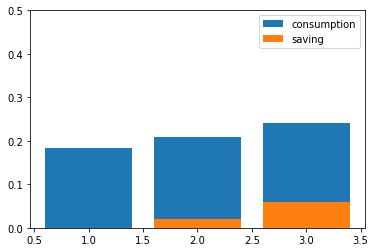

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.004466000000000747}

In [226]:
SS_tol = 1.E-8
beta = .442
params = (beta, sigma, nvec, A, alpha, delta, SS_tol)
get_SS(params, bvec_guess, True )

[0.02817692 0.07686545]


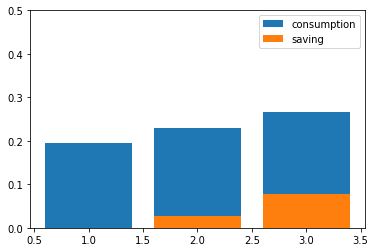

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0005989999999975737}

In [162]:
##we see what happens when we change beta
beta = .55
params = (beta, sigma, nvec, A, alpha, delta, SS_tol)
get_SS(params, bvec_guess, True)

We observe that households save more as their beta increases, which is intuitive as they have a higher value on future income.

## Exercise 2.3

In [163]:
def intertemp(b32, *params):
    w1, r1, b21, beta, r2, w2, sigma = params
    
    x = uprime(w1 + (1+r1)*b21 - b32, sigma) - beta*(1+r2)*uprime((1+r2)*b32 + .2*w2, sigma)
    return x
def eulers(b, *params):
    wt, wtp, wtp2, rtp, rtp2, sigma = params
    b2t = b[0]
    b3tp = b[1]
    ret = np.zeros(2)
    ret[0] = uprime(wt- b2t, sigma) - beta*(1+rtp)*uprime(wtp+ (1+rtp)*b2t - b3tp, sigma)
    ret[1] = uprime(wtp + (1+rtp)*b2t - b3tp, sigma) - beta*(1+rtp2)*uprime((1+rtp2)*b3tp + .2*wtp2, sigma)
    return ret



In [164]:
T = 25
xi = .8
beta = .442
epsilon = 1.E-9
params = (beta, sigma, nvec, A, alpha, delta, SS_tol)
steady_state = get_SS(params, bvec_guess, False)
b_steady = steady_state['b_ss']
k_steady = steady_state['K_ss']
w_steady = steady_state['w_ss']
r_steady = steady_state['r_ss']
b_start = np.array([.8*b_steady[0], 1.1*b_steady[1]])
K_1 = get_k(b_start[0], b_start[1])

K_time_grid = np.linspace(K_1, k_steady, T)
np.append(K_time_grid, np.array([k_steady, k_steady, k_steady]))
dist = 100
L = 1+ 1+.2
#perform Time path iteration
iters = 0
while dist > epsilon:
    w_grid = get_w(K_time_grid, L, (alpha, A, delta))
    w_grid = np.append(w_grid, np.array([w_steady,w_steady,w_steady]))
    r_grid = get_r(K_time_grid, L, (alpha, A, delta))
    r_grid = np.append(r_grid, np.array([r_steady,r_steady,r_steady]))
    b_2_grid = np.zeros(T)
    b_3_grid = np.zeros(T+1)
    b_2_grid[0] = b_start[0]
    b_3_grid[0] = b_start[1]
    param_inter = (w_grid[0], r_grid[0], b_2_grid[0], beta, r_grid[1], w_grid[1], sigma)
    b_3_grid[1] = fsolve(intertemp, .1, args=param_inter)
    iters += 1
    K_time_new = np.zeros(T)
    K_time_new[0] = K_time_grid[0]
    for i in range(1, T):
        params_euler = (w_grid[i-1], w_grid[i], w_grid[i+1], r_grid[i+1], r_grid[i+2], sigma)
        bsols = fsolve(eulers, [.1,.1], args=params_euler)
        b_2_grid[i] = bsols[0]
        b_3_grid[i+1] = bsols[1]
        K_time_new[i] = b_2_grid[i] + b_3_grid[i]
    K_time_old = K_time_grid
    K_time_grid = xi*(K_time_new) + (1-xi)*K_time_old
    dist = np.sum((K_time_grid - K_time_old)**2)
    print("Iteration:{} \nL2 Norm:{}".format(iters, dist))

print("Converged in {} Iterations.".format(iters))

[0.01931253 0.0584111 ]
Iteration:1 
L2 Norm:1.7427528570223185e-05
Iteration:2 
L2 Norm:3.5881806503211743e-06
Iteration:3 
L2 Norm:8.598742156901477e-07
Iteration:4 
L2 Norm:2.2867102612730345e-07
Iteration:5 
L2 Norm:6.419572846592407e-08
Iteration:6 
L2 Norm:1.8486207102531112e-08
Iteration:7 
L2 Norm:5.397711016179181e-09
Iteration:8 
L2 Norm:1.5879947483230593e-09
Iteration:9 
L2 Norm:4.69165053796278e-10
Converged in 9 Iterations.


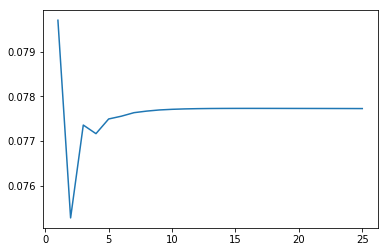

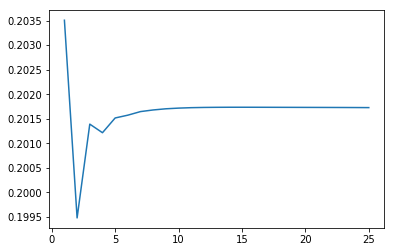

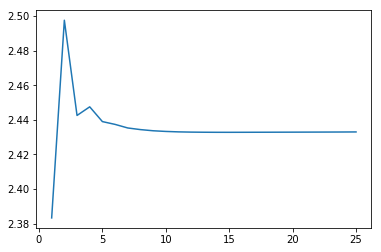

In [165]:
plt.plot(np.linspace(1,T,T), K_time_grid)
plt.show()
plt.close()
plt.plot(np.linspace(1,T,T), w_grid[0:T])
plt.show()
plt.close()
plt.plot(np.linspace(1,T,T), r_grid[0:T])


## Exercise 3.2

In [189]:
beta = .96
delta = .05
sigma = 3
A = 1
alpha = .35
def get_k_var(b):
    K = np.sum(b)
    return K

def euler_errs_var(bvec, *params):
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    K = get_k_var(bvec)
    L = np.sum(nvec)
    w = get_w(K, L, (alpha, A, delta))
    r = get_r(K, L, (alpha, A, delta))
    cvec = np.zeros(len(nvec))
    eulerrs = np.zeros(len(bvec))
    for i in range(len(cvec)):
        if i == 0:
            cvec[i] = w*nvec[i] - bvec[i]
        elif i == len(cvec) - 1:
            cvec[i] = w*nvec[i] + (1+r)*bvec[i-1]
        else:
            cvec[i] = w*nvec[i] + (1+r)*bvec[i-1] - bvec[i]
    for j in range(len(eulerrs)):
        eulerrs[j] = uprime(cvec[j], sigma) - beta*(1+r)*uprime(cvec[j+1], sigma)

    
#     c1 = w*n1 - b2
#     c2 = w*n2 + (1+r)*b2 - b3
#     c3 = w*n3 + (1+r)*b3
#     eulerr[0] = uprime(c1, sigma) - beta*(1+r)*uprime(c2, sigma)
#     eulerr[1] = uprime(c2, sigma) - beta*(1+r)*uprime(c3, sigma)
    return eulerrs
def get_SS_var(params, bvec_guess, SS_graphs):
    start_time = time.clock()
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    bsol = fsolve(euler_errs_var, bvec_guess, args=(params))
    L = np.sum(nvec)
    b_ss = bsol
    K_ss = get_k_var(b_ss)
    w_ss = get_w(K_ss, L, (alpha, A, delta))
    r_ss = get_r(K_ss, L, (alpha, A, delta))
    Y_ss = get_Y(K_ss, L, (alpha, A))
    cvec = np.zeros(len(nvec))
    for i in range(len(cvec)):
        if i == 0:
            cvec[i] = w_ss*nvec[i] - b_ss[i]
        elif i == len(cvec) - 1:
            cvec[i] = w_ss*nvec[i] + (1+r_ss)*b_ss[i-1]
        else:
            cvec[i] = w_ss*nvec[i] + (1+r_ss)*b_ss[i-1] - b_ss[i]
    C_ss = np.sum(cvec)
    c_ss = cvec
    eulerrs = np.zeros(len(b_ss))
    for j in range(len(eulerrs)):
        eulerrs[j] = uprime(cvec[j], sigma) - beta*(1+r_ss)*uprime(cvec[j+1], sigma)    
    EulErr_ss = eulerrs
#     EulErr_ss = np.array([EulErr1, EulErr2])
    RCerr_ss = Y_ss - C_ss - delta*K_ss
    
    ss_time = time.clock() - start_time
    ss_output = { 'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
                'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
                'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
                'ss_time': ss_time}
    

    return ss_output
    
    
    
    

In [213]:
bvec_guess = .1*np.ones(79)
nvec = np.ones(79)
nvec = np.append(nvec, .2)
# beta = .442
# delta = .6415
# sigma = 3
# A = 1
# alpha = .35
# bvec_guess = [.1,.1]
# nvec = [1,1,.2]
params = beta, sigma, nvec, A, alpha, delta, SS_tol
ss_output = get_SS_var(params, bvec_guess, False)
print("Time Taken: {} Seconds".format(ss_output['ss_time']))
print(ss_output)

Time Taken: 0.08017999999999859 Seconds
{'b_ss': array([0.14956477, 0.30028039, 0.45213627, 0.60512018, 0.75921804,
       0.91441388, 1.07068959, 1.22802484, 1.38639684, 1.54578024,
       1.70614682, 1.86746539, 2.02970148, 2.19281714, 2.35677066,
       2.5215163 , 2.68700397, 2.85317892, 3.0199814 , 3.18734626,
       3.35520259, 3.52347325, 3.69207445, 3.86091522, 4.02989691,
       4.1989126 , 4.36784653, 4.53657339, 4.70495769, 4.87285293,
       5.04010088, 5.20653066, 5.37195783, 5.53618341, 5.69899279,
       5.86015463, 6.01941959, 6.17651906, 6.33116373, 6.48304208,
       6.63181877, 6.77713291, 6.91859619, 7.05579089, 7.18826774,
       7.31554363, 7.43709913, 7.55237589, 7.66077378, 7.76164785,
       7.85430512, 7.93800106, 8.01193583, 8.07525032, 8.12702181,
       8.16625939, 8.19189897, 8.20279802, 8.19772986, 8.17537756,
       8.13432742, 8.07306194, 7.98995231, 7.88325036, 7.75107986,
       7.59142733, 7.40213203, 7.18087535, 6.92516934, 6.63234447,
       6.2995

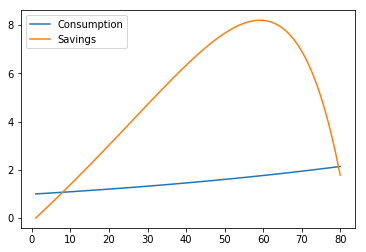

In [214]:
plt.plot(np.linspace(1, 80, 80), ss_output['c_ss'], label="Consumption")
b_steady = ss_output['b_ss']
b_steady = np.insert(b_steady, 0, 0)
plt.plot(np.linspace(1, 80, 80), b_steady, label="Savings")
plt.legend()
plt.show()

Time Taken: 0.08734700000000117 Seconds


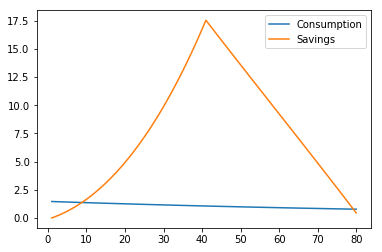

In [215]:
n_vec_1 = np.ones(40)
n_vec_2 = np.ones(40)*0.2
nvec = np.append(n_vec_1, n_vec_2)
bvec_guess = .1*np.ones(79)
params = beta, sigma, nvec, A, alpha, delta, SS_tol
ss_output = get_SS_var(params, bvec_guess, False)
print("Time Taken: {} Seconds".format(ss_output['ss_time']))

plt.plot(np.linspace(1, 80, 80), ss_output['c_ss'], label="Consumption")
b_steady = ss_output['b_ss']
b_steady = np.insert(b_steady, 0, 0)
plt.plot(np.linspace(1, 80, 80), b_steady, label="Savings")
plt.legend()
plt.show()

In [216]:
ss_output

{'b_ss': array([ 0.12750186,  0.26877057,  0.42394716,  0.59317577,  0.77660375,
         0.97438164,  1.18666326,  1.41360578,  1.6553697 ,  1.91211899,
         2.18402106,  2.47124688,  2.77397097,  3.09237154,  3.42663045,
         3.77693334,  4.14346965,  4.52643272,  4.92601977,  5.34243207,
         5.77587492,  6.22655773,  6.69469411,  7.18050193,  7.68420335,
         8.20602495,  8.74619773,  9.30495725,  9.88254364, 10.47920172,
        11.09518106, 11.73073603, 12.38612593, 13.06161499, 13.75747256,
        14.47397307, 15.2113962 , 15.97002694, 16.75015566, 17.5520782 ,
        17.10917075, 16.66717719, 16.22604588, 15.78572483, 15.3461617 ,
        14.9073038 , 14.46909804, 14.03149098, 13.59442876, 13.15785715,
        12.72172146, 12.28596662, 11.8505371 , 11.41537693, 10.98042966,
        10.54563841, 10.11094578,  9.67629388,  9.24162434,  8.80687824,
         8.37199615,  7.93691806,  7.50158346,  7.06593121,  6.62989962,
         6.1934264 ,  5.75644864,  5.318902

Note that now, consumtion is decreasing over time rather than increasing, savings increases sharply until age 40 when people retire, where it has a kink and decreases. Moreover, wage is higher, and the interest rate on savings is a lot lower. 

The intuition behind this is that people save to smooth consumption, so in preparation for retirement they save a lot when young, decreasing once they retire. Wage is higher as there is a lot less labor supply available in the steady state. The interest rate decreases as there is a lot more aggregate saving in the steady state. 